In [1]:
#Importing the libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
% matplotlib inline
import math

C:\Users\SHIVAM SINGH\Anaconda3\lib\site-packages\ipykernel\parentpoller.py:116: UserWarning: Parent poll failed.  If the frontend dies,
                the kernel may be left running.  Please let us know
                about your system (bitness, Python, etc.) at
                ipython-dev@scipy.org
  ipython-dev@scipy.org""")


In [2]:
#Importing the Dataset

Data = pd.read_csv("titanic.csv")
Data.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


In [3]:
print("# of passengers in our data:" +str(len(Data.index)))

# of passengers in our data:887


## Analyzing Our Data

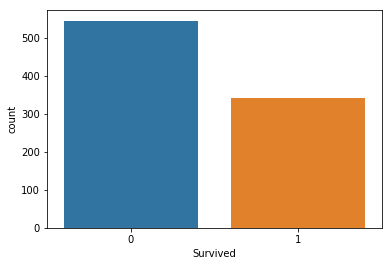

In [4]:
sns.countplot(x="Survived", data=Data)

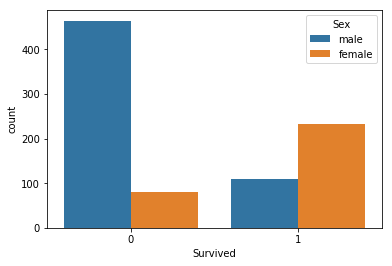

In [5]:
sns.countplot(x="Survived", hue = "Sex", data=Data)

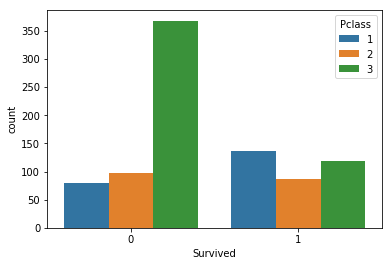

In [6]:
sns.countplot(x="Survived", hue = "Pclass", data=Data)

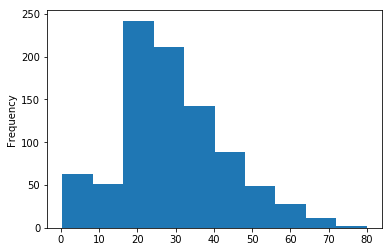

In [7]:
Data["Age"].plot.hist()

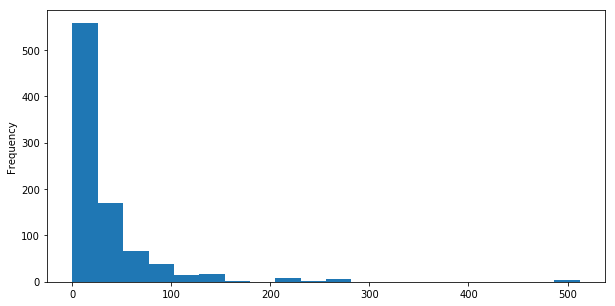

In [8]:
Data["Fare"].plot.hist(bins = 20 , figsize = (10,5))

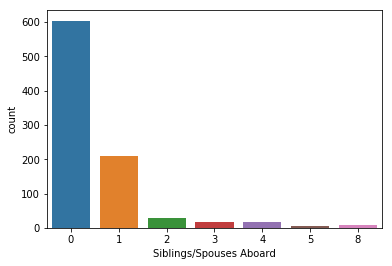

In [9]:
sns.countplot(x="Siblings/Spouses Aboard", data=Data)

In [10]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887 entries, 0 to 886
Data columns (total 8 columns):
Survived                   887 non-null int64
Pclass                     887 non-null int64
Name                       887 non-null object
Sex                        887 non-null object
Age                        887 non-null float64
Siblings/Spouses Aboard    887 non-null int64
Parents/Children Aboard    887 non-null int64
Fare                       887 non-null float64
dtypes: float64(2), int64(4), object(2)
memory usage: 55.5+ KB


##  Data Wrangling

In [11]:
Data.isnull().sum()

Survived                   0
Pclass                     0
Name                       0
Sex                        0
Age                        0
Siblings/Spouses Aboard    0
Parents/Children Aboard    0
Fare                       0
dtype: int64

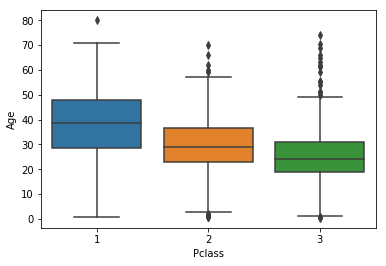

In [12]:
sns.boxplot(x="Pclass",y="Age",data=Data)

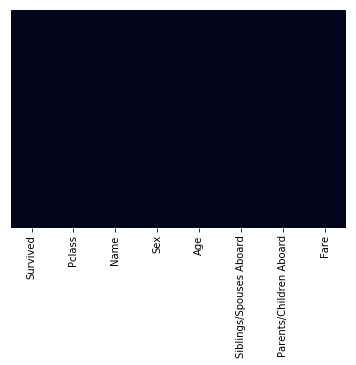

In [13]:
 sns.heatmap(Data.isnull(),yticklabels=False, cbar=False)

In [14]:
ones = pd.DataFrame(np.ones((Data.shape[0],1)),columns=["bias"]) # Adding Bias In Our Column

In [15]:
Data = pd.concat([Data,ones],axis=1)

In [16]:
Data = Data.drop(['Name','Sex'],axis=1)

In [17]:
Data.head()

,Survived,Pclass,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,bias
0,0,3,22.0,1,0,7.2500,1.0
1,1,1,38.0,1,0,71.2833,1.0
2,1,3,26.0,0,0,7.9250,1.0
3,1,1,35.0,1,0,53.1000,1.0
4,0,3,35.0,0,0,8.0500,1.0


### Training Our Data

In [18]:
X = Data.drop(['Survived'],axis=1)

In [19]:
y = Data['Survived']

In [20]:
y = np.array(y)

In [21]:
X.shape

(887, 6)

In [22]:
y.shape

(887,)

### Spliting Our Data

In [23]:
from sklearn.cross_validation import train_test_split

C:\Users\SHIVAM SINGH\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

In [25]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((665, 6), (222, 6), (665,), (222,))

## Now The Maths Of Our Logistic Regression Start

## Hypothesis

$$h_\theta(x) = g(\theta^T.x) $$

$$ Z = \theta^T.x $$
                            
$$ g(Z) = \frac{1}{1+e^{-Z}} $$

## Sigmoid Function

$$ Sigmoid  Function = \frac{1}{1+e^{-Z}}$$

In [26]:
def sigmoid(Z):
    return 1/(1+np.exp(-Z))

## Logistic Loss

$$ J(\theta) = \frac{-1}{m}.\displaystyle\sum_{i=1}^{m}[y^ilog(h_\theta(x^i)) + (1-y^i)log(1 - h_\theta(x^i))] $$


In [27]:
def logistic_loss(y,y_hat):
    return -np.mean(y * np.log(y_hat) + (1-y) * np.log(1-y_hat))

In [28]:
W = [0, 0, 0, 0, 0, 0]
learning_rate = 0.001

## Now Apply Gradient Descent

$$ \frac{\mathrm d J(\theta)}{\mathrm d \theta_J} = \frac{1}{m}.X^T(g(X\theta) - y) $$

In [29]:
m = len(y_train)

for epoch in range(50000):
    Z = np.matmul(X_train,W)
    A = sigmoid(Z)
    loss = logistic_loss(y_train,A)
    dz = A - y_train
    dw = 1/m * np.matmul(X_train.T,dz)
    db = np.sum(dz)
    
    W = W - learning_rate*dw
    
    if epoch%100==0:
        print(loss)

0.6931471805599453
0.6092122331380037
0.6072194925268639
0.6054500351849592
0.6038778233729688
0.6024795564325264
0.6012344764520723
0.6001241610392303
0.5991323126376313
0.5982445515884415
0.5974482179827537
0.5967321855877019
0.5960866897458804
0.5955031701048236
0.594974128278442
0.5944930000206038
0.5940540411513134
0.5936522262736591
0.5932831592180334
0.5929429941196729
0.5926283660535533
0.5923363302000362
0.5920643085827528
0.591810043498115
0.5915715568372366
0.5913471145817918
0.59113519583269
0.590934465802843
0.5907437522718518
0.5905620250608631
0.590388378140129
0.5902220140302147
0.5900622302007029
0.589908407208084
0.5897599983477683
0.5896165206242909
0.5894775468692302
0.5893426988585654
0.5892116413005487
0.5890840765819899
0.5889597401754861
0.5888383966228451
0.5887198360209922
0.588603870946238
0.5884903337611149
0.5883790742552182
0.5882699575777642
0.5881628624250376
0.5880576794506286
0.5879543098704904
0.5878526642384135
0.5877526613706378
0.5876542274010231
0

0.5733558595242312
0.5733327419671729
0.5733096497918185
0.57328658295018
0.5732635413946824
0.5732405250781574
0.5732175339538371
0.5731945679753474
0.5731716270967023
0.573148711272297
0.573125820456903
0.5731029546056612
0.5730801136740771
0.573057297618014
0.5730345063936886
0.5730117399576642
0.5729889982668468
0.5729662812784784
0.5729435889501326
0.5729209212397092
0.572898278105429
0.5728756595058291
0.5728530653997579
0.5728304957463702
0.5728079505051228
0.5727854296357692
0.5727629330983558
0.5727404608532165
0.5727180128609696
0.5726955890825121
0.5726731894790159
0.5726508140119239
0.5726284626429458
0.5726061353340535
0.5725838320474775
0.5725615527457032
0.5725392973914665
0.5725170659477504
0.5724948583777808
0.5724726746450237
0.5724505147131803
0.5724283785461847
0.5724062661081994
0.5723841773636129
0.572362112277035
0.5723400708132947
0.572318052937436
0.5722960586147156
0.5722740878105984
0.572252140490756
0.5722302166210625
0.5722083161675919
0.5721864390966148
0.

## Prediction

In [30]:
preds = []
for i in sigmoid(Z):
    if i > 0.5:
        preds.append(1)
    else:
        preds.append(0)

In [31]:
from sklearn.metrics import accuracy_score

In [32]:
print(accuracy_score(y_train,preds)*100)

72.03007518796993
